In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

16

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/45".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/45
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50187 stdev: 0.05002
Best fitness: 0.76005 - size: (2, 13) - species 6 - id 40
Average adjusted fitness: 0.194
Mean genetic distance 2.919, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.440 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52382 stdev: 0.05916
Best fitness: 0.76005 - size: (2, 13) - species 6 - id 40
Average adjusted fitness: 0.189
Mean genetic distance 2.943, standard deviation 0.501
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.542 sec (8.491 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53988 stdev: 0.06395
Best fitness: 0.76005 - size: (2, 13) - species 6 - id 40
Average adjusted fitness: 0.156
Mean genetic distance 2.955, standard deviation 0.491
Population of 201 members in 29 species
Total

Population's average fitness: 0.60652 stdev: 0.08637
Best fitness: 0.76809 - size: (3, 15) - species 36 - id 2481
Average adjusted fitness: 0.199
Mean genetic distance 3.181, standard deviation 0.495
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 9.790 sec (9.774 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61182 stdev: 0.08164
Best fitness: 0.76809 - size: (3, 15) - species 36 - id 2481
Average adjusted fitness: 0.214
Mean genetic distance 3.159, standard deviation 0.502
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 11.111 sec (9.908 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60780 stdev: 0.08227
Best fitness: 0.76809 - size: (3, 15) - species 36 - id 2481
Average adjusted fitness: 0.205
Mean genetic distance 3.147, standard deviation 0.503
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 10.362 sec (9.973 average)

 ****

Population's average fitness: 0.61081 stdev: 0.08350
Best fitness: 0.77984 - size: (3, 16) - species 36 - id 6408
Average adjusted fitness: 0.166
Mean genetic distance 3.191, standard deviation 0.583
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.722 sec (11.708 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.60907 stdev: 0.08398
Best fitness: 0.77984 - size: (3, 16) - species 36 - id 6408
Average adjusted fitness: 0.199
Mean genetic distance 3.160, standard deviation 0.600
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.846 sec (11.744 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61117 stdev: 0.08484
Best fitness: 0.77984 - size: (3, 16) - species 36 - id 6408
Average adjusted fitness: 0.172
Mean genetic distance 3.123, standard deviation 0.563
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 11.361 sec (11.680 average)

 

Population's average fitness: 0.58172 stdev: 0.09105
Best fitness: 0.75387 - size: (4, 18) - species 4 - id 686
Average adjusted fitness: 0.238
Mean genetic distance 3.143, standard deviation 0.538
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.258 sec (9.712 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58779 stdev: 0.08667
Best fitness: 0.75387 - size: (4, 18) - species 4 - id 686
Average adjusted fitness: 0.210
Mean genetic distance 3.132, standard deviation 0.519
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.261 sec (9.648 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59809 stdev: 0.08262
Best fitness: 0.75387 - size: (4, 18) - species 4 - id 686
Average adjusted fitness: 0.224
Mean genetic distance 3.148, standard deviation 0.519
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.071 sec (9.576 average)

 ****** Runnin

Population's average fitness: 0.62480 stdev: 0.09576
Best fitness: 0.78664 - size: (6, 19) - species 43 - id 3768
Average adjusted fitness: 0.225
Mean genetic distance 3.283, standard deviation 0.506
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 10.042 sec (10.477 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61919 stdev: 0.09841
Best fitness: 0.78664 - size: (6, 19) - species 43 - id 3768
Average adjusted fitness: 0.224
Mean genetic distance 3.298, standard deviation 0.507
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.744 sec (10.422 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62575 stdev: 0.10164
Best fitness: 0.79159 - size: (7, 20) - species 43 - id 4236
Average adjusted fitness: 0.289
Mean genetic distance 3.299, standard deviation 0.503
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 10.686 sec (10.433 average)

 

Population's average fitness: 0.62891 stdev: 0.10545
Best fitness: 0.81138 - size: (8, 22) - species 8 - id 6944
Average adjusted fitness: 0.241
Mean genetic distance 3.251, standard deviation 0.599
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.692 sec (12.054 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.63318 stdev: 0.10057
Best fitness: 0.82127 - size: (10, 31) - species 50 - id 7730
Average adjusted fitness: 0.249
Mean genetic distance 3.256, standard deviation 0.601
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 12.447 sec (12.123 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63738 stdev: 0.09617
Best fitness: 0.82127 - size: (10, 31) - species 50 - id 7730
Average adjusted fitness: 0.245
Mean genetic distance 3.242, standard deviation 0.599
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.928 sec (12.252 average)



Population's average fitness: 0.68625 stdev: 0.11314
Best fitness: 0.83426 - size: (6, 19) - species 19 - id 1230
Average adjusted fitness: 0.385
Mean genetic distance 3.098, standard deviation 0.472
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 11.378 sec (10.556 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69385 stdev: 0.10483
Best fitness: 0.83426 - size: (6, 19) - species 19 - id 1230
Average adjusted fitness: 0.395
Mean genetic distance 3.110, standard deviation 0.474
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 11.338 sec (10.735 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69810 stdev: 0.10405
Best fitness: 0.83426 - size: (6, 19) - species 19 - id 1230
Average adjusted fitness: 0.400
Mean genetic distance 3.101, standard deviation 0.478
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.994 sec (10.884 average)

 

Population's average fitness: 0.72499 stdev: 0.09569
Best fitness: 0.83797 - size: (7, 24) - species 9 - id 3987
Average adjusted fitness: 0.407
Mean genetic distance 3.309, standard deviation 0.506
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.880 sec (11.625 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.71100 stdev: 0.12190
Best fitness: 0.83797 - size: (7, 24) - species 9 - id 3987
Average adjusted fitness: 0.437
Mean genetic distance 3.302, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 11.429 sec (11.540 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.70921 stdev: 0.12804
Best fitness: 0.84725 - size: (5, 22) - species 44 - id 4938
Average adjusted fitness: 0.462
Mean genetic distance 3.346, standard deviation 0.504
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 11.474 sec (11.651 average)

 **

Population's average fitness: 0.70971 stdev: 0.12067
Best fitness: 0.86395 - size: (9, 29) - species 45 - id 7948
Average adjusted fitness: 0.411
Mean genetic distance 3.255, standard deviation 0.546
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 13.164 sec (13.669 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.70690 stdev: 0.12164
Best fitness: 0.86395 - size: (9, 29) - species 45 - id 7948
Average adjusted fitness: 0.414
Mean genetic distance 3.231, standard deviation 0.539
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.431 sec (13.772 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.72077 stdev: 0.09921
Best fitness: 0.86518 - size: (9, 29) - species 45 - id 8638
Average adjusted fitness: 0.421
Mean genetic distance 3.214, standard deviation 0.548
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 13.700 sec (13.704 average)

 

Population's average fitness: 0.64552 stdev: 0.13195
Best fitness: 0.79963 - size: (5, 22) - species 36 - id 1805
Average adjusted fitness: 0.381
Mean genetic distance 3.204, standard deviation 0.479
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 9.553 sec (9.585 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64167 stdev: 0.13644
Best fitness: 0.79963 - size: (5, 22) - species 36 - id 1805
Average adjusted fitness: 0.347
Mean genetic distance 3.192, standard deviation 0.476
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 9.231 sec (9.578 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66609 stdev: 0.11413
Best fitness: 0.79963 - size: (5, 22) - species 36 - id 1805
Average adjusted fitness: 0.389
Mean genetic distance 3.202, standard deviation 0.477
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 10.376 sec (9.689 average)

 *****

Population's average fitness: 0.64776 stdev: 0.12876
Best fitness: 0.80087 - size: (7, 26) - species 36 - id 3710
Average adjusted fitness: 0.342
Mean genetic distance 3.173, standard deviation 0.523
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 10.989 sec (10.386 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65047 stdev: 0.13465
Best fitness: 0.80087 - size: (7, 26) - species 36 - id 3710
Average adjusted fitness: 0.340
Mean genetic distance 3.180, standard deviation 0.526
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.485 sec (10.382 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66247 stdev: 0.12617
Best fitness: 0.80087 - size: (7, 26) - species 36 - id 3710
Average adjusted fitness: 0.357
Mean genetic distance 3.183, standard deviation 0.528
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 10.801 sec (10.436 average)

 

Population's average fitness: 0.66608 stdev: 0.12207
Best fitness: 0.82004 - size: (6, 22) - species 55 - id 7533
Average adjusted fitness: 0.357
Mean genetic distance 3.212, standard deviation 0.550
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.691 sec (11.704 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.67074 stdev: 0.13285
Best fitness: 0.82004 - size: (6, 22) - species 55 - id 7533
Average adjusted fitness: 0.365
Mean genetic distance 3.194, standard deviation 0.558
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 11.544 sec (11.682 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.64809 stdev: 0.14319
Best fitness: 0.82004 - size: (6, 22) - species 55 - id 7533
Average adjusted fitness: 0.352
Mean genetic distance 3.210, standard deviation 0.556
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.271 sec (11.638 average)

 

Population's average fitness: 0.61477 stdev: 0.08949
Best fitness: 0.78231 - size: (4, 17) - species 21 - id 1337
Average adjusted fitness: 0.328
Mean genetic distance 3.216, standard deviation 0.479
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 9.846 sec (9.657 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62648 stdev: 0.08872
Best fitness: 0.78417 - size: (5, 19) - species 21 - id 2762
Average adjusted fitness: 0.290
Mean genetic distance 3.205, standard deviation 0.481
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 10.004 sec (9.724 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62979 stdev: 0.08382
Best fitness: 0.78417 - size: (5, 19) - species 21 - id 2762
Average adjusted fitness: 0.182
Mean genetic distance 3.210, standard deviation 0.488
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.628 sec (9.743 average)

 *****

Population's average fitness: 0.62777 stdev: 0.10239
Best fitness: 0.80334 - size: (6, 21) - species 54 - id 5622
Average adjusted fitness: 0.305
Mean genetic distance 3.154, standard deviation 0.561
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 10.875 sec (10.965 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.63493 stdev: 0.09833
Best fitness: 0.80334 - size: (6, 21) - species 54 - id 5622
Average adjusted fitness: 0.202
Mean genetic distance 3.135, standard deviation 0.561
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 11.405 sec (11.012 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64029 stdev: 0.09641
Best fitness: 0.80334 - size: (6, 21) - species 54 - id 5622
Average adjusted fitness: 0.190
Mean genetic distance 3.156, standard deviation 0.559
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.033 sec (11.183 average)

 

Population's average fitness: 0.62016 stdev: 0.12745
Best fitness: 0.79530 - size: (3, 15) - species 4 - id 299
Average adjusted fitness: 0.334
Mean genetic distance 2.934, standard deviation 0.482
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.848 sec (7.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62452 stdev: 0.13171
Best fitness: 0.79530 - size: (3, 15) - species 4 - id 299
Average adjusted fitness: 0.339
Mean genetic distance 3.005, standard deviation 0.505
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.079 sec (7.791 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65773 stdev: 0.11948
Best fitness: 0.79530 - size: (3, 15) - species 4 - id 299
Average adjusted fitness: 0.362
Mean genetic distance 3.045, standard deviation 0.494
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.054 sec (7.857 average)

 ****** Running

Population's average fitness: 0.70117 stdev: 0.12083
Best fitness: 0.82931 - size: (6, 21) - species 32 - id 3447
Average adjusted fitness: 0.478
Mean genetic distance 3.250, standard deviation 0.503
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.902 sec (10.182 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69284 stdev: 0.12948
Best fitness: 0.82931 - size: (6, 21) - species 32 - id 3447
Average adjusted fitness: 0.389
Mean genetic distance 3.228, standard deviation 0.503
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 10.437 sec (10.219 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70085 stdev: 0.12783
Best fitness: 0.83179 - size: (7, 24) - species 6 - id 3862
Average adjusted fitness: 0.397
Mean genetic distance 3.269, standard deviation 0.533
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 10.001 sec (10.190 average)

 **

Population's average fitness: 0.69740 stdev: 0.12114
Best fitness: 0.83983 - size: (7, 25) - species 6 - id 4446
Average adjusted fitness: 0.397
Mean genetic distance 3.255, standard deviation 0.547
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 12.099 sec (11.002 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.68369 stdev: 0.13581
Best fitness: 0.83983 - size: (7, 25) - species 6 - id 4446
Average adjusted fitness: 0.392
Mean genetic distance 3.256, standard deviation 0.566
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.699 sec (11.085 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.69412 stdev: 0.12963
Best fitness: 0.84045 - size: (11, 33) - species 38 - id 7580
Average adjusted fitness: 0.384
Mean genetic distance 3.256, standard deviation 0.563
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 11.802 sec (11.185 average)

 *

Population's average fitness: 0.63152 stdev: 0.12863
Best fitness: 0.77427 - size: (3, 14) - species 33 - id 808
Average adjusted fitness: 0.344
Mean genetic distance 3.080, standard deviation 0.458
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 8.998 sec (8.431 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63273 stdev: 0.13137
Best fitness: 0.77675 - size: (5, 17) - species 14 - id 1152
Average adjusted fitness: 0.359
Mean genetic distance 3.103, standard deviation 0.453
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 8.799 sec (8.477 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63051 stdev: 0.13274
Best fitness: 0.77675 - size: (5, 17) - species 14 - id 1152
Average adjusted fitness: 0.373
Mean genetic distance 3.134, standard deviation 0.465
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 9.124 sec (8.548 average)

 ****** Ru

Population's average fitness: 0.66194 stdev: 0.12732
Best fitness: 0.80458 - size: (4, 18) - species 33 - id 2811
Average adjusted fitness: 0.365
Mean genetic distance 3.305, standard deviation 0.518
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 10.801 sec (10.445 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66055 stdev: 0.12892
Best fitness: 0.80458 - size: (4, 18) - species 33 - id 2811
Average adjusted fitness: 0.359
Mean genetic distance 3.304, standard deviation 0.519
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 11.169 sec (10.580 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65255 stdev: 0.13496
Best fitness: 0.80458 - size: (4, 18) - species 33 - id 2811
Average adjusted fitness: 0.367
Mean genetic distance 3.305, standard deviation 0.525
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 10.752 sec (10.653 average)

 

Population's average fitness: 0.67132 stdev: 0.11883
Best fitness: 0.82375 - size: (13, 34) - species 21 - id 7166
Average adjusted fitness: 0.392
Mean genetic distance 3.346, standard deviation 0.577
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 14.134 sec (12.433 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.65703 stdev: 0.13348
Best fitness: 0.82375 - size: (13, 34) - species 21 - id 7166
Average adjusted fitness: 0.371
Mean genetic distance 3.353, standard deviation 0.583
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 13.126 sec (12.605 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66978 stdev: 0.13594
Best fitness: 0.82375 - size: (13, 34) - species 21 - id 7166
Average adjusted fitness: 0.371
Mean genetic distance 3.305, standard deviation 0.605
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.415 sec (12.726 average)

Population's average fitness: 0.62040 stdev: 0.08639
Best fitness: 0.75263 - size: (3, 15) - species 7 - id 1355
Average adjusted fitness: 0.307
Mean genetic distance 3.035, standard deviation 0.481
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.980 sec (8.913 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62430 stdev: 0.08710
Best fitness: 0.75263 - size: (3, 15) - species 7 - id 1355
Average adjusted fitness: 0.258
Mean genetic distance 3.061, standard deviation 0.476
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.057 sec (8.987 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62782 stdev: 0.08971
Best fitness: 0.75263 - size: (3, 15) - species 7 - id 1355
Average adjusted fitness: 0.252
Mean genetic distance 3.060, standard deviation 0.476
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.967 sec (9.134 average)

 ****** Ru

Population's average fitness: 0.62700 stdev: 0.09503
Best fitness: 0.75572 - size: (10, 27) - species 35 - id 4539
Average adjusted fitness: 0.242
Mean genetic distance 3.233, standard deviation 0.529
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 11.354 sec (11.067 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.62761 stdev: 0.09771
Best fitness: 0.75572 - size: (10, 27) - species 35 - id 4539
Average adjusted fitness: 0.277
Mean genetic distance 3.242, standard deviation 0.527
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 11.560 sec (11.127 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62443 stdev: 0.10726
Best fitness: 0.75572 - size: (10, 27) - species 35 - id 4539
Average adjusted fitness: 0.300
Mean genetic distance 3.242, standard deviation 0.519
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 10.808 sec (11.133 average)

Population's average fitness: 0.63707 stdev: 0.08639
Best fitness: 0.75943 - size: (10, 29) - species 35 - id 6269
Average adjusted fitness: 0.248
Mean genetic distance 3.310, standard deviation 0.555
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 12.031 sec (11.926 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.63169 stdev: 0.07584
Best fitness: 0.75943 - size: (10, 29) - species 35 - id 6269
Average adjusted fitness: 0.230
Mean genetic distance 3.275, standard deviation 0.579
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 12.139 sec (11.873 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64089 stdev: 0.07550
Best fitness: 0.75943 - size: (10, 29) - species 35 - id 6269
Average adjusted fitness: 0.249
Mean genetic distance 3.253, standard deviation 0.582
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 12.048 sec (11.916 average)

Population's average fitness: 0.70774 stdev: 0.11642
Best fitness: 0.83859 - size: (4, 19) - species 36 - id 1986
Average adjusted fitness: 0.405
Mean genetic distance 3.198, standard deviation 0.469
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.019 sec (9.264 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70275 stdev: 0.12125
Best fitness: 0.83859 - size: (4, 19) - species 36 - id 1986
Average adjusted fitness: 0.406
Mean genetic distance 3.195, standard deviation 0.479
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.475 sec (9.266 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71032 stdev: 0.11706
Best fitness: 0.83859 - size: (4, 19) - species 36 - id 1986
Average adjusted fitness: 0.409
Mean genetic distance 3.192, standard deviation 0.486
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.966 sec (9.389 average)

 *****

Population's average fitness: 0.69154 stdev: 0.14979
Best fitness: 0.86766 - size: (8, 24) - species 33 - id 5467
Average adjusted fitness: 0.489
Mean genetic distance 3.252, standard deviation 0.540
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 11.308 sec (10.980 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.70906 stdev: 0.12978
Best fitness: 0.86766 - size: (8, 24) - species 33 - id 5467
Average adjusted fitness: 0.426
Mean genetic distance 3.263, standard deviation 0.558
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 11.731 sec (11.018 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.71261 stdev: 0.13623
Best fitness: 0.86766 - size: (8, 24) - species 33 - id 5467
Average adjusted fitness: 0.491
Mean genetic distance 3.269, standard deviation 0.563
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 11.834 sec (11.167 average)

 

Population's average fitness: 0.70184 stdev: 0.12722
Best fitness: 0.87879 - size: (9, 22) - species 21 - id 8368
Average adjusted fitness: 0.388
Mean genetic distance 3.348, standard deviation 0.589
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.876 sec (12.739 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.70715 stdev: 0.13274
Best fitness: 0.87879 - size: (9, 22) - species 21 - id 8368
Average adjusted fitness: 0.406
Mean genetic distance 3.336, standard deviation 0.598
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.406 sec (12.823 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.72121 stdev: 0.12222
Best fitness: 0.87879 - size: (9, 22) - species 21 - id 8368
Average adjusted fitness: 0.416
Mean genetic distance 3.353, standard deviation 0.597
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 13.550 sec (12.942 average)
ru

Population's average fitness: 0.62244 stdev: 0.09410
Best fitness: 0.78046 - size: (4, 17) - species 20 - id 2096
Average adjusted fitness: 0.230
Mean genetic distance 3.192, standard deviation 0.484
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 10.262 sec (10.230 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61445 stdev: 0.10230
Best fitness: 0.78046 - size: (4, 17) - species 20 - id 2096
Average adjusted fitness: 0.332
Mean genetic distance 3.212, standard deviation 0.479
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 9.742 sec (10.225 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61447 stdev: 0.10614
Best fitness: 0.78046 - size: (4, 17) - species 20 - id 2096
Average adjusted fitness: 0.297
Mean genetic distance 3.218, standard deviation 0.476
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.556 sec (10.252 average)

 *

Population's average fitness: 0.63398 stdev: 0.10123
Best fitness: 0.79654 - size: (8, 23) - species 35 - id 6534
Average adjusted fitness: 0.236
Mean genetic distance 3.220, standard deviation 0.557
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 11.919 sec (11.479 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62033 stdev: 0.10704
Best fitness: 0.79654 - size: (8, 23) - species 35 - id 6534
Average adjusted fitness: 0.227
Mean genetic distance 3.251, standard deviation 0.552
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 11.390 sec (11.575 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.61375 stdev: 0.10858
Best fitness: 0.79654 - size: (8, 23) - species 35 - id 6534
Average adjusted fitness: 0.250
Mean genetic distance 3.277, standard deviation 0.580
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 11.292 sec (11.560 average)

 

Population's average fitness: 0.59485 stdev: 0.10631
Best fitness: 0.79097 - size: (4, 16) - species 9 - id 493
Average adjusted fitness: 0.281
Mean genetic distance 3.087, standard deviation 0.514
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.025 sec (7.749 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59808 stdev: 0.10718
Best fitness: 0.79097 - size: (4, 16) - species 9 - id 493
Average adjusted fitness: 0.297
Mean genetic distance 3.106, standard deviation 0.504
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 8.338 sec (7.896 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61134 stdev: 0.10261
Best fitness: 0.79406 - size: (4, 16) - species 21 - id 715
Average adjusted fitness: 0.317
Mean genetic distance 3.158, standard deviation 0.501
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.618 sec (8.241 average)

 ****** Runnin

Population's average fitness: 0.67131 stdev: 0.10057
Best fitness: 0.81880 - size: (6, 23) - species 4 - id 2455
Average adjusted fitness: 0.260
Mean genetic distance 3.219, standard deviation 0.534
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 9.998 sec (9.904 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66241 stdev: 0.12251
Best fitness: 0.81880 - size: (6, 23) - species 4 - id 2455
Average adjusted fitness: 0.346
Mean genetic distance 3.204, standard deviation 0.526
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 10.036 sec (9.925 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66829 stdev: 0.11080
Best fitness: 0.81880 - size: (6, 23) - species 4 - id 2455
Average adjusted fitness: 0.290
Mean genetic distance 3.226, standard deviation 0.532
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 9.841 sec (10.006 average)

 ****** 

Population's average fitness: 0.66470 stdev: 0.12660
Best fitness: 0.85220 - size: (12, 35) - species 24 - id 6712
Average adjusted fitness: 0.383
Mean genetic distance 3.299, standard deviation 0.538
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 12.338 sec (12.612 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.66745 stdev: 0.11697
Best fitness: 0.85220 - size: (12, 35) - species 24 - id 6712
Average adjusted fitness: 0.342
Mean genetic distance 3.320, standard deviation 0.539
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 12.494 sec (12.578 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.67586 stdev: 0.11207
Best fitness: 0.85220 - size: (12, 35) - species 24 - id 6712
Average adjusted fitness: 0.385
Mean genetic distance 3.315, standard deviation 0.564
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 12.257 sec (12.602 average)

Population's average fitness: 0.59566 stdev: 0.07700
Best fitness: 0.76685 - size: (4, 17) - species 21 - id 810
Average adjusted fitness: 0.241
Mean genetic distance 3.127, standard deviation 0.478
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.911 sec (8.797 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59448 stdev: 0.08071
Best fitness: 0.77489 - size: (5, 19) - species 21 - id 1366
Average adjusted fitness: 0.203
Mean genetic distance 3.150, standard deviation 0.460
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.315 sec (8.854 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60902 stdev: 0.07812
Best fitness: 0.77489 - size: (5, 19) - species 21 - id 1366
Average adjusted fitness: 0.208
Mean genetic distance 3.183, standard deviation 0.452
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.159 sec (8.885 average)

 ****** Ru

Population's average fitness: 0.62950 stdev: 0.08440
Best fitness: 0.77922 - size: (5, 18) - species 21 - id 3312
Average adjusted fitness: 0.251
Mean genetic distance 3.281, standard deviation 0.477
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 10.489 sec (10.603 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62827 stdev: 0.09083
Best fitness: 0.77922 - size: (5, 18) - species 21 - id 3312
Average adjusted fitness: 0.214
Mean genetic distance 3.277, standard deviation 0.485
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.836 sec (10.595 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63037 stdev: 0.08997
Best fitness: 0.80581 - size: (5, 19) - species 21 - id 4473
Average adjusted fitness: 0.229
Mean genetic distance 3.255, standard deviation 0.494
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 10.975 sec (10.682 average)

 

Population's average fitness: 0.63902 stdev: 0.10185
Best fitness: 0.82251 - size: (5, 19) - species 21 - id 5331
Average adjusted fitness: 0.314
Mean genetic distance 3.272, standard deviation 0.544
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 11.253 sec (11.419 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63599 stdev: 0.09747
Best fitness: 0.82251 - size: (5, 19) - species 21 - id 5331
Average adjusted fitness: 0.172
Mean genetic distance 3.277, standard deviation 0.537
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 12.658 sec (11.601 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63364 stdev: 0.09609
Best fitness: 0.82251 - size: (5, 19) - species 21 - id 5331
Average adjusted fitness: 0.202
Mean genetic distance 3.281, standard deviation 0.538
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.001 sec (11.658 average)

 

Population's average fitness: 0.69582 stdev: 0.13464
Best fitness: 0.86704 - size: (9, 19) - species 35 - id 1731
Average adjusted fitness: 0.427
Mean genetic distance 3.167, standard deviation 0.482
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.919 sec (9.494 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70054 stdev: 0.12753
Best fitness: 0.87817 - size: (10, 21) - species 35 - id 1997
Average adjusted fitness: 0.397
Mean genetic distance 3.168, standard deviation 0.496
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.575 sec (9.616 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70040 stdev: 0.13169
Best fitness: 0.87817 - size: (10, 21) - species 35 - id 1997
Average adjusted fitness: 0.395
Mean genetic distance 3.192, standard deviation 0.487
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.860 sec (9.680 average)

 ****

Population's average fitness: 0.71893 stdev: 0.14000
Best fitness: 0.87817 - size: (10, 21) - species 35 - id 1997
Average adjusted fitness: 0.508
Mean genetic distance 3.270, standard deviation 0.492
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 11.565 sec (11.349 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.71736 stdev: 0.13511
Best fitness: 0.87817 - size: (10, 21) - species 35 - id 1997
Average adjusted fitness: 0.492
Mean genetic distance 3.283, standard deviation 0.498
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.523 sec (11.385 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.71132 stdev: 0.14069
Best fitness: 0.87817 - size: (10, 21) - species 35 - id 1997
Average adjusted fitness: 0.412
Mean genetic distance 3.285, standard deviation 0.489
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.504 sec (11.484 average)

Population's average fitness: 0.71367 stdev: 0.14185
Best fitness: 0.88064 - size: (7, 20) - species 38 - id 8678
Average adjusted fitness: 0.490
Mean genetic distance 3.288, standard deviation 0.551
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 13.153 sec (13.209 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.71264 stdev: 0.14431
Best fitness: 0.88064 - size: (7, 20) - species 38 - id 8678
Average adjusted fitness: 0.464
Mean genetic distance 3.327, standard deviation 0.540
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.736 sec (13.302 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.71154 stdev: 0.14607
Best fitness: 0.88064 - size: (7, 20) - species 38 - id 8678
Average adjusted fitness: 0.544
Mean genetic distance 3.338, standard deviation 0.544
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 13.695 sec (13.326 average)

 

Population's average fitness: 0.75095 stdev: 0.15396
Best fitness: 0.88064 - size: (6, 21) - species 35 - id 2472
Average adjusted fitness: 0.556
Mean genetic distance 3.160, standard deviation 0.504
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.436 sec (9.483 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76578 stdev: 0.13604
Best fitness: 0.88064 - size: (6, 21) - species 35 - id 2472
Average adjusted fitness: 0.569
Mean genetic distance 3.169, standard deviation 0.499
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.701 sec (9.559 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77872 stdev: 0.11725
Best fitness: 0.88064 - size: (6, 21) - species 35 - id 2472
Average adjusted fitness: 0.581
Mean genetic distance 3.184, standard deviation 0.502
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 9.698 sec (9.648 average)

 ******

Population's average fitness: 0.77902 stdev: 0.13337
Best fitness: 0.88868 - size: (9, 27) - species 15 - id 4677
Average adjusted fitness: 0.568
Mean genetic distance 3.186, standard deviation 0.530
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 11.895 sec (10.472 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76319 stdev: 0.15210
Best fitness: 0.88868 - size: (9, 27) - species 15 - id 4677
Average adjusted fitness: 0.546
Mean genetic distance 3.186, standard deviation 0.526
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 10.874 sec (10.533 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.75476 stdev: 0.16749
Best fitness: 0.88868 - size: (9, 27) - species 15 - id 4677
Average adjusted fitness: 0.593
Mean genetic distance 3.197, standard deviation 0.514
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 10.673 sec (10.553 average)

 

Population's average fitness: 0.75787 stdev: 0.16183
Best fitness: 0.89425 - size: (9, 30) - species 58 - id 8995
Average adjusted fitness: 0.557
Mean genetic distance 3.075, standard deviation 0.568
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 12.476 sec (12.152 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.77983 stdev: 0.13060
Best fitness: 0.89487 - size: (10, 32) - species 58 - id 9795
Average adjusted fitness: 0.578
Mean genetic distance 3.124, standard deviation 0.573
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.456 sec (12.260 average)
running:14/45
number of class1:490
number of class2:1127

 ****** Running generation 0 ****** 

Population's average fitness: 0.54171 stdev: 0.13466
Best fitness: 0.77860 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.222
Mean genetic distance 2.866, standard deviation 0.494
Population of 201 members in 18 species
Total extinctio

Population's average fitness: 0.67233 stdev: 0.10806
Best fitness: 0.79901 - size: (9, 26) - species 26 - id 3377
Average adjusted fitness: 0.366
Mean genetic distance 3.135, standard deviation 0.533
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 10.375 sec (9.960 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67493 stdev: 0.10571
Best fitness: 0.79901 - size: (9, 26) - species 26 - id 3377
Average adjusted fitness: 0.386
Mean genetic distance 3.135, standard deviation 0.528
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 10.002 sec (10.051 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67396 stdev: 0.11132
Best fitness: 0.79901 - size: (9, 26) - species 26 - id 3377
Average adjusted fitness: 0.372
Mean genetic distance 3.148, standard deviation 0.530
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 10.317 sec (10.145 average)

 *

Population's average fitness: 0.67704 stdev: 0.09901
Best fitness: 0.79901 - size: (9, 26) - species 26 - id 3377
Average adjusted fitness: 0.370
Mean genetic distance 3.261, standard deviation 0.577
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.145 sec (12.246 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.66703 stdev: 0.10300
Best fitness: 0.79901 - size: (9, 26) - species 26 - id 3377
Average adjusted fitness: 0.364
Mean genetic distance 3.279, standard deviation 0.588
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 12.339 sec (12.301 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.66997 stdev: 0.11073
Best fitness: 0.79901 - size: (9, 26) - species 26 - id 3377
Average adjusted fitness: 0.366
Mean genetic distance 3.288, standard deviation 0.574
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 12.763 sec (12.473 average)

 

Population's average fitness: 0.56701 stdev: 0.08235
Best fitness: 0.78046 - size: (4, 17) - species 3 - id 681
Average adjusted fitness: 0.226
Mean genetic distance 3.092, standard deviation 0.460
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.437 sec (8.189 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57975 stdev: 0.08501
Best fitness: 0.78417 - size: (4, 16) - species 3 - id 817
Average adjusted fitness: 0.197
Mean genetic distance 3.114, standard deviation 0.468
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.648 sec (8.281 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59604 stdev: 0.08556
Best fitness: 0.78417 - size: (4, 16) - species 3 - id 817
Average adjusted fitness: 0.217
Mean genetic distance 3.120, standard deviation 0.486
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 8.968 sec (8.396 average)

 ****** Running

Population's average fitness: 0.64844 stdev: 0.09985
Best fitness: 0.80519 - size: (6, 23) - species 22 - id 2813
Average adjusted fitness: 0.226
Mean genetic distance 3.186, standard deviation 0.499
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 11.121 sec (10.577 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65586 stdev: 0.10143
Best fitness: 0.80581 - size: (8, 26) - species 22 - id 3716
Average adjusted fitness: 0.216
Mean genetic distance 3.199, standard deviation 0.498
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 11.547 sec (10.577 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66317 stdev: 0.09783
Best fitness: 0.80643 - size: (6, 22) - species 47 - id 3829
Average adjusted fitness: 0.199
Mean genetic distance 3.221, standard deviation 0.513
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 12.404 sec (10.762 average)

 

Population's average fitness: 0.64815 stdev: 0.09354
Best fitness: 0.82066 - size: (9, 28) - species 22 - id 6726
Average adjusted fitness: 0.226
Mean genetic distance 3.342, standard deviation 0.594
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.712 sec (13.112 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64959 stdev: 0.10034
Best fitness: 0.82066 - size: (10, 31) - species 22 - id 6898
Average adjusted fitness: 0.209
Mean genetic distance 3.320, standard deviation 0.603
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 13.760 sec (13.210 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64422 stdev: 0.09940
Best fitness: 0.82066 - size: (9, 28) - species 56 - id 6726
Average adjusted fitness: 0.229
Mean genetic distance 3.347, standard deviation 0.602
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 12.957 sec (13.173 average)



Population's average fitness: 0.56735 stdev: 0.06235
Best fitness: 0.69944 - size: (6, 18) - species 28 - id 842
Average adjusted fitness: 0.158
Mean genetic distance 3.086, standard deviation 0.462
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.405 sec (8.910 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57615 stdev: 0.06552
Best fitness: 0.69944 - size: (6, 18) - species 28 - id 842
Average adjusted fitness: 0.193
Mean genetic distance 3.064, standard deviation 0.468
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 9.073 sec (8.927 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57925 stdev: 0.06533
Best fitness: 0.72233 - size: (7, 20) - species 28 - id 1663
Average adjusted fitness: 0.146
Mean genetic distance 3.067, standard deviation 0.470
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.492 sec (9.033 average)

 ****** Ru

Population's average fitness: 0.59901 stdev: 0.06964
Best fitness: 0.72356 - size: (8, 20) - species 28 - id 3899
Average adjusted fitness: 0.164
Mean genetic distance 3.241, standard deviation 0.470
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 10.412 sec (10.546 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.60024 stdev: 0.07457
Best fitness: 0.72356 - size: (8, 20) - species 28 - id 3899
Average adjusted fitness: 0.204
Mean genetic distance 3.250, standard deviation 0.477
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 10.941 sec (10.642 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.60642 stdev: 0.07138
Best fitness: 0.72356 - size: (8, 20) - species 28 - id 3899
Average adjusted fitness: 0.205
Mean genetic distance 3.244, standard deviation 0.489
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 10.660 sec (10.727 average)

 

Population's average fitness: 0.59084 stdev: 0.07366
Best fitness: 0.74644 - size: (9, 26) - species 49 - id 7880
Average adjusted fitness: 0.196
Mean genetic distance 3.275, standard deviation 0.608
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 13.173 sec (12.605 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.59105 stdev: 0.07812
Best fitness: 0.74644 - size: (9, 26) - species 49 - id 7880
Average adjusted fitness: 0.198
Mean genetic distance 3.251, standard deviation 0.608
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 12.164 sec (12.507 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.59007 stdev: 0.07909
Best fitness: 0.76376 - size: (10, 28) - species 49 - id 8722
Average adjusted fitness: 0.196
Mean genetic distance 3.236, standard deviation 0.589
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 12.990 sec (12.559 average)



Population's average fitness: 0.58255 stdev: 0.07260
Best fitness: 0.74954 - size: (6, 20) - species 11 - id 1336
Average adjusted fitness: 0.205
Mean genetic distance 3.173, standard deviation 0.461
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.468 sec (9.719 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59012 stdev: 0.07431
Best fitness: 0.74954 - size: (6, 20) - species 11 - id 1336
Average adjusted fitness: 0.296
Mean genetic distance 3.177, standard deviation 0.466
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 9.727 sec (9.720 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58340 stdev: 0.07364
Best fitness: 0.74954 - size: (6, 20) - species 11 - id 1336
Average adjusted fitness: 0.189
Mean genetic distance 3.213, standard deviation 0.464
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 10.247 sec (9.840 average)

 *****

Population's average fitness: 0.60230 stdev: 0.08855
Best fitness: 0.79406 - size: (7, 26) - species 41 - id 5059
Average adjusted fitness: 0.170
Mean genetic distance 3.216, standard deviation 0.534
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 11.657 sec (11.418 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61612 stdev: 0.08663
Best fitness: 0.80396 - size: (8, 26) - species 41 - id 5358
Average adjusted fitness: 0.242
Mean genetic distance 3.258, standard deviation 0.533
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 12.351 sec (11.532 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.61184 stdev: 0.08442
Best fitness: 0.80396 - size: (8, 26) - species 41 - id 5358
Average adjusted fitness: 0.160
Mean genetic distance 3.281, standard deviation 0.539
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 12.265 sec (11.630 average)

 

Population's average fitness: 0.61232 stdev: 0.09654
Best fitness: 0.80643 - size: (7, 28) - species 44 - id 8908
Average adjusted fitness: 0.268
Mean genetic distance 3.254, standard deviation 0.578
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 12.907 sec (12.719 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61415 stdev: 0.09354
Best fitness: 0.80643 - size: (7, 28) - species 44 - id 8908
Average adjusted fitness: 0.197
Mean genetic distance 3.226, standard deviation 0.565
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 13.962 sec (12.892 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.61835 stdev: 0.09175
Best fitness: 0.80643 - size: (7, 28) - species 44 - id 8908
Average adjusted fitness: 0.210
Mean genetic distance 3.198, standard deviation 0.577
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 13.562 sec (13.026 average)

 

Population's average fitness: 0.60789 stdev: 0.09329
Best fitness: 0.73840 - size: (5, 20) - species 13 - id 2439
Average adjusted fitness: 0.324
Mean genetic distance 3.284, standard deviation 0.477
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.708 sec (9.742 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60945 stdev: 0.09380
Best fitness: 0.73902 - size: (8, 23) - species 37 - id 2837
Average adjusted fitness: 0.242
Mean genetic distance 3.262, standard deviation 0.480
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.616 sec (9.802 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60534 stdev: 0.09897
Best fitness: 0.74830 - size: (9, 24) - species 37 - id 2970
Average adjusted fitness: 0.312
Mean genetic distance 3.278, standard deviation 0.485
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.679 sec (9.862 average)

 ******

Population's average fitness: 0.63736 stdev: 0.09161
Best fitness: 0.77984 - size: (13, 41) - species 39 - id 5490
Average adjusted fitness: 0.278
Mean genetic distance 3.326, standard deviation 0.509
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 13.035 sec (11.222 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63473 stdev: 0.09386
Best fitness: 0.77984 - size: (13, 41) - species 39 - id 5490
Average adjusted fitness: 0.304
Mean genetic distance 3.311, standard deviation 0.515
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.282 sec (11.240 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63491 stdev: 0.09098
Best fitness: 0.77984 - size: (13, 41) - species 39 - id 5490
Average adjusted fitness: 0.250
Mean genetic distance 3.305, standard deviation 0.520
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.940 sec (11.370 average)

Population's average fitness: 0.63417 stdev: 0.09559
Best fitness: 0.77984 - size: (7, 23) - species 12 - id 6650
Average adjusted fitness: 0.307
Mean genetic distance 3.338, standard deviation 0.612
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 12.841 sec (13.091 average)
running:19/45
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.50118 stdev: 0.05855
Best fitness: 0.70625 - size: (2, 13) - species 6 - id 179
Average adjusted fitness: 0.173
Mean genetic distance 2.877, standard deviation 0.457
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.204 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53086 stdev: 0.06195
Best fitness: 0.70625 - size: (2, 13) - species 6 - id 179
Average adjusted fitness: 0.179
Mean genetic distance 2.970, standard deviation 0.488
Population of 199 members in 26 species
Total extinctions: 0
Generation time

Population's average fitness: 0.60894 stdev: 0.08795
Best fitness: 0.76252 - size: (7, 21) - species 6 - id 1758
Average adjusted fitness: 0.224
Mean genetic distance 3.346, standard deviation 0.515
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 10.017 sec (9.922 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61057 stdev: 0.08577
Best fitness: 0.76252 - size: (7, 21) - species 6 - id 1758
Average adjusted fitness: 0.243
Mean genetic distance 3.353, standard deviation 0.522
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.263 sec (9.973 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60696 stdev: 0.08867
Best fitness: 0.76314 - size: (6, 21) - species 21 - id 3548
Average adjusted fitness: 0.216
Mean genetic distance 3.342, standard deviation 0.521
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.246 sec (10.025 average)

 ****

Population's average fitness: 0.61735 stdev: 0.08366
Best fitness: 0.78293 - size: (8, 24) - species 3 - id 4855
Average adjusted fitness: 0.273
Mean genetic distance 3.251, standard deviation 0.596
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 12.331 sec (11.963 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.61864 stdev: 0.08358
Best fitness: 0.78293 - size: (8, 24) - species 3 - id 4855
Average adjusted fitness: 0.160
Mean genetic distance 3.274, standard deviation 0.593
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.869 sec (11.991 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61686 stdev: 0.08413
Best fitness: 0.78293 - size: (8, 24) - species 3 - id 4855
Average adjusted fitness: 0.165
Mean genetic distance 3.236, standard deviation 0.592
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 12.422 sec (12.115 average)

 ***

Population's average fitness: 0.57663 stdev: 0.09344
Best fitness: 0.72294 - size: (3, 14) - species 19 - id 383
Average adjusted fitness: 0.233
Mean genetic distance 3.131, standard deviation 0.485
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.420 sec (8.488 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58443 stdev: 0.09138
Best fitness: 0.72294 - size: (3, 14) - species 19 - id 383
Average adjusted fitness: 0.210
Mean genetic distance 3.133, standard deviation 0.484
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.985 sec (8.571 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58803 stdev: 0.08831
Best fitness: 0.72294 - size: (3, 14) - species 19 - id 383
Average adjusted fitness: 0.241
Mean genetic distance 3.164, standard deviation 0.479
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.586 sec (8.716 average)

 ****** Runn

Population's average fitness: 0.62510 stdev: 0.09254
Best fitness: 0.76129 - size: (6, 21) - species 23 - id 2002
Average adjusted fitness: 0.346
Mean genetic distance 3.220, standard deviation 0.498
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.124 sec (10.202 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61721 stdev: 0.09937
Best fitness: 0.76129 - size: (6, 21) - species 23 - id 2002
Average adjusted fitness: 0.257
Mean genetic distance 3.239, standard deviation 0.490
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.381 sec (10.254 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62763 stdev: 0.09193
Best fitness: 0.76129 - size: (6, 21) - species 23 - id 2002
Average adjusted fitness: 0.278
Mean genetic distance 3.243, standard deviation 0.487
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.316 sec (10.293 average)

 

Population's average fitness: 0.61303 stdev: 0.11098
Best fitness: 0.77118 - size: (7, 22) - species 19 - id 6315
Average adjusted fitness: 0.316
Mean genetic distance 3.299, standard deviation 0.595
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 11.423 sec (11.421 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.61276 stdev: 0.10867
Best fitness: 0.77118 - size: (7, 22) - species 19 - id 6315
Average adjusted fitness: 0.286
Mean genetic distance 3.294, standard deviation 0.589
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 11.256 sec (11.400 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.62506 stdev: 0.09878
Best fitness: 0.77304 - size: (10, 29) - species 45 - id 7629
Average adjusted fitness: 0.232
Mean genetic distance 3.338, standard deviation 0.582
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 11.262 sec (11.414 average)



Population's average fitness: 0.71459 stdev: 0.17888
Best fitness: 0.87879 - size: (6, 21) - species 12 - id 1351
Average adjusted fitness: 0.516
Mean genetic distance 3.114, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.529 sec (8.659 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72455 stdev: 0.17291
Best fitness: 0.89054 - size: (4, 15) - species 31 - id 1584
Average adjusted fitness: 0.589
Mean genetic distance 3.119, standard deviation 0.472
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 8.900 sec (8.833 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73069 stdev: 0.17362
Best fitness: 0.89054 - size: (4, 15) - species 31 - id 1584
Average adjusted fitness: 0.529
Mean genetic distance 3.110, standard deviation 0.474
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 8.973 sec (8.966 average)

 ******

Population's average fitness: 0.74094 stdev: 0.18988
Best fitness: 0.92764 - size: (5, 22) - species 5 - id 4559
Average adjusted fitness: 0.540
Mean genetic distance 3.243, standard deviation 0.546
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.067 sec (10.605 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75112 stdev: 0.18178
Best fitness: 0.92826 - size: (6, 24) - species 5 - id 4714
Average adjusted fitness: 0.552
Mean genetic distance 3.275, standard deviation 0.534
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 10.934 sec (10.682 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76776 stdev: 0.15564
Best fitness: 0.93321 - size: (6, 25) - species 46 - id 4862
Average adjusted fitness: 0.619
Mean genetic distance 3.267, standard deviation 0.541
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 10.881 sec (10.718 average)

 **

Population's average fitness: 0.70543 stdev: 0.23208
Best fitness: 0.94372 - size: (11, 28) - species 33 - id 7361
Average adjusted fitness: 0.507
Mean genetic distance 3.164, standard deviation 0.623
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 11.878 sec (12.273 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.71483 stdev: 0.22411
Best fitness: 0.94372 - size: (11, 28) - species 33 - id 7361
Average adjusted fitness: 0.516
Mean genetic distance 3.202, standard deviation 0.600
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 12.224 sec (12.258 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.69114 stdev: 0.24279
Best fitness: 0.94434 - size: (11, 28) - species 33 - id 8523
Average adjusted fitness: 0.495
Mean genetic distance 3.155, standard deviation 0.619
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 12.284 sec (12.325 average)

Population's average fitness: 0.62469 stdev: 0.08383
Best fitness: 0.78602 - size: (6, 22) - species 36 - id 1573
Average adjusted fitness: 0.240
Mean genetic distance 3.182, standard deviation 0.518
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 9.361 sec (9.438 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61141 stdev: 0.09156
Best fitness: 0.78602 - size: (6, 22) - species 36 - id 1573
Average adjusted fitness: 0.231
Mean genetic distance 3.205, standard deviation 0.534
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 9.655 sec (9.525 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62422 stdev: 0.08999
Best fitness: 0.81200 - size: (7, 22) - species 31 - id 2267
Average adjusted fitness: 0.200
Mean genetic distance 3.185, standard deviation 0.536
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 9.350 sec (9.520 average)

 ******

Population's average fitness: 0.64183 stdev: 0.10473
Best fitness: 0.84230 - size: (8, 27) - species 3 - id 5083
Average adjusted fitness: 0.233
Mean genetic distance 3.351, standard deviation 0.543
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 11.084 sec (11.061 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63421 stdev: 0.10409
Best fitness: 0.84230 - size: (8, 27) - species 3 - id 5083
Average adjusted fitness: 0.251
Mean genetic distance 3.300, standard deviation 0.561
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 11.353 sec (11.141 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.64365 stdev: 0.09850
Best fitness: 0.84230 - size: (8, 27) - species 3 - id 5083
Average adjusted fitness: 0.233
Mean genetic distance 3.325, standard deviation 0.557
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 10.820 sec (11.149 average)

 ***

Population's average fitness: 0.64521 stdev: 0.10414
Best fitness: 0.84539 - size: (11, 31) - species 3 - id 8467
Average adjusted fitness: 0.371
Mean genetic distance 3.298, standard deviation 0.630
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 12.289 sec (12.547 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65312 stdev: 0.10162
Best fitness: 0.84539 - size: (11, 31) - species 3 - id 8467
Average adjusted fitness: 0.226
Mean genetic distance 3.312, standard deviation 0.630
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.802 sec (12.549 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.65505 stdev: 0.10072
Best fitness: 0.84539 - size: (11, 31) - species 3 - id 8467
Average adjusted fitness: 0.241
Mean genetic distance 3.337, standard deviation 0.596
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 12.427 sec (12.592 average)

 

Population's average fitness: 0.65937 stdev: 0.11593
Best fitness: 0.78046 - size: (5, 16) - species 28 - id 2803
Average adjusted fitness: 0.357
Mean genetic distance 3.166, standard deviation 0.537
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 9.455 sec (9.768 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65145 stdev: 0.11047
Best fitness: 0.78046 - size: (5, 16) - species 28 - id 2803
Average adjusted fitness: 0.348
Mean genetic distance 3.172, standard deviation 0.536
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 9.995 sec (9.799 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64304 stdev: 0.12338
Best fitness: 0.78046 - size: (5, 16) - species 28 - id 2803
Average adjusted fitness: 0.373
Mean genetic distance 3.206, standard deviation 0.531
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 9.549 sec (9.820 average)

 ******

Population's average fitness: 0.65435 stdev: 0.12074
Best fitness: 0.79592 - size: (7, 25) - species 33 - id 5024
Average adjusted fitness: 0.341
Mean genetic distance 3.261, standard deviation 0.528
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 10.937 sec (11.014 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65214 stdev: 0.12723
Best fitness: 0.79592 - size: (7, 25) - species 33 - id 5024
Average adjusted fitness: 0.335
Mean genetic distance 3.245, standard deviation 0.537
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 11.210 sec (11.094 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65150 stdev: 0.12541
Best fitness: 0.79592 - size: (7, 25) - species 33 - id 5024
Average adjusted fitness: 0.326
Mean genetic distance 3.250, standard deviation 0.534
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 11.020 sec (11.112 average)

 

Population's average fitness: 0.49226 stdev: 0.09154
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.163
Mean genetic distance 2.879, standard deviation 0.462
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53340 stdev: 0.10396
Best fitness: 0.74459 - size: (2, 13) - species 15 - id 273
Average adjusted fitness: 0.311
Mean genetic distance 2.991, standard deviation 0.484
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.392 sec (7.767 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56303 stdev: 0.09215
Best fitness: 0.76005 - size: (4, 16) - species 13 - id 490
Average adjusted fitness: 0.266
Mean genetic distance 3.023, standard deviation 0.501
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.985 sec (7.840 average)

 ****** Running generation 3 **

Population's average fitness: 0.63581 stdev: 0.10938
Best fitness: 0.80025 - size: (5, 17) - species 15 - id 2560
Average adjusted fitness: 0.272
Mean genetic distance 3.207, standard deviation 0.516
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 10.149 sec (10.094 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62536 stdev: 0.11386
Best fitness: 0.80025 - size: (5, 17) - species 15 - id 2560
Average adjusted fitness: 0.246
Mean genetic distance 3.182, standard deviation 0.510
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.213 sec (10.062 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63549 stdev: 0.10739
Best fitness: 0.80025 - size: (5, 17) - species 15 - id 2560
Average adjusted fitness: 0.267
Mean genetic distance 3.181, standard deviation 0.516
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.168 sec (10.085 average)

 

Population's average fitness: 0.63320 stdev: 0.12609
Best fitness: 0.83426 - size: (9, 26) - species 5 - id 6944
Average adjusted fitness: 0.371
Mean genetic distance 3.155, standard deviation 0.572
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 11.319 sec (11.146 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65484 stdev: 0.11480
Best fitness: 0.83426 - size: (9, 26) - species 5 - id 6944
Average adjusted fitness: 0.282
Mean genetic distance 3.168, standard deviation 0.577
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.160 sec (11.288 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63440 stdev: 0.12577
Best fitness: 0.83426 - size: (9, 26) - species 5 - id 6944
Average adjusted fitness: 0.299
Mean genetic distance 3.165, standard deviation 0.575
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 12.473 sec (11.444 average)

 ***

Population's average fitness: 0.66018 stdev: 0.10193
Best fitness: 0.77798 - size: (4, 18) - species 16 - id 958
Average adjusted fitness: 0.399
Mean genetic distance 3.104, standard deviation 0.516
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.228 sec (8.268 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66143 stdev: 0.09932
Best fitness: 0.77798 - size: (4, 18) - species 35 - id 958
Average adjusted fitness: 0.355
Mean genetic distance 3.114, standard deviation 0.518
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 9.282 sec (8.413 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66893 stdev: 0.10344
Best fitness: 0.77798 - size: (4, 18) - species 35 - id 958
Average adjusted fitness: 0.375
Mean genetic distance 3.142, standard deviation 0.500
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 9.665 sec (8.569 average)

 ****** Runn

Population's average fitness: 0.67337 stdev: 0.11621
Best fitness: 0.77798 - size: (6, 20) - species 34 - id 1345
Average adjusted fitness: 0.375
Mean genetic distance 3.262, standard deviation 0.499
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 11.349 sec (11.153 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67719 stdev: 0.10842
Best fitness: 0.77798 - size: (6, 20) - species 34 - id 1345
Average adjusted fitness: 0.378
Mean genetic distance 3.260, standard deviation 0.497
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 11.576 sec (11.273 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.69215 stdev: 0.09371
Best fitness: 0.78355 - size: (5, 19) - species 35 - id 4490
Average adjusted fitness: 0.394
Mean genetic distance 3.226, standard deviation 0.498
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 11.673 sec (11.400 average)

 

Population's average fitness: 0.67389 stdev: 0.12315
Best fitness: 0.78664 - size: (15, 45) - species 14 - id 5858
Average adjusted fitness: 0.376
Mean genetic distance 3.141, standard deviation 0.611
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 14.300 sec (13.245 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.66983 stdev: 0.12033
Best fitness: 0.78664 - size: (15, 45) - species 14 - id 5858
Average adjusted fitness: 0.368
Mean genetic distance 3.169, standard deviation 0.580
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 14.042 sec (13.296 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.66913 stdev: 0.12566
Best fitness: 0.78664 - size: (15, 45) - species 14 - id 5858
Average adjusted fitness: 0.394
Mean genetic distance 3.210, standard deviation 0.590
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 13.228 sec (13.166 average)

Population's average fitness: 0.65922 stdev: 0.12742
Best fitness: 0.81262 - size: (3, 18) - species 32 - id 1213
Average adjusted fitness: 0.360
Mean genetic distance 3.128, standard deviation 0.466
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 9.262 sec (8.989 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65323 stdev: 0.13292
Best fitness: 0.81262 - size: (3, 18) - species 32 - id 1213
Average adjusted fitness: 0.409
Mean genetic distance 3.150, standard deviation 0.463
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 9.807 sec (9.083 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66099 stdev: 0.12649
Best fitness: 0.81262 - size: (3, 18) - species 32 - id 1213
Average adjusted fitness: 0.355
Mean genetic distance 3.143, standard deviation 0.457
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 11.013 sec (9.366 average)

 *****

Population's average fitness: 0.65027 stdev: 0.15832
Best fitness: 0.82931 - size: (4, 19) - species 32 - id 2745
Average adjusted fitness: 0.371
Mean genetic distance 3.275, standard deviation 0.545
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 10.677 sec (10.746 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65899 stdev: 0.15467
Best fitness: 0.82931 - size: (4, 19) - species 32 - id 2745
Average adjusted fitness: 0.384
Mean genetic distance 3.280, standard deviation 0.541
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 10.552 sec (10.797 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66206 stdev: 0.14280
Best fitness: 0.82931 - size: (4, 19) - species 32 - id 2745
Average adjusted fitness: 0.363
Mean genetic distance 3.250, standard deviation 0.535
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 10.629 sec (10.789 average)

 

Population's average fitness: 0.67226 stdev: 0.14365
Best fitness: 0.82931 - size: (4, 19) - species 32 - id 2745
Average adjusted fitness: 0.375
Mean genetic distance 3.231, standard deviation 0.614
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.495 sec (12.016 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.69093 stdev: 0.13051
Best fitness: 0.82931 - size: (4, 19) - species 32 - id 2745
Average adjusted fitness: 0.392
Mean genetic distance 3.229, standard deviation 0.588
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.533 sec (12.147 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.65712 stdev: 0.15030
Best fitness: 0.82931 - size: (4, 19) - species 32 - id 2745
Average adjusted fitness: 0.390
Mean genetic distance 3.220, standard deviation 0.604
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 12.020 sec (12.208 average)

 

Population's average fitness: 0.72620 stdev: 0.18924
Best fitness: 0.92579 - size: (3, 12) - species 13 - id 1731
Average adjusted fitness: 0.522
Mean genetic distance 3.041, standard deviation 0.484
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.330 sec (9.014 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73495 stdev: 0.18122
Best fitness: 0.92888 - size: (5, 19) - species 19 - id 2314
Average adjusted fitness: 0.542
Mean genetic distance 3.103, standard deviation 0.487
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.457 sec (9.113 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73343 stdev: 0.19161
Best fitness: 0.92888 - size: (5, 19) - species 19 - id 2314
Average adjusted fitness: 0.540
Mean genetic distance 3.120, standard deviation 0.489
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.987 sec (9.157 average)

 ******

Population's average fitness: 0.72400 stdev: 0.20281
Best fitness: 0.94929 - size: (4, 12) - species 40 - id 4903
Average adjusted fitness: 0.519
Mean genetic distance 3.147, standard deviation 0.526
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 10.791 sec (10.444 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.75230 stdev: 0.17016
Best fitness: 0.94929 - size: (4, 12) - species 40 - id 4903
Average adjusted fitness: 0.551
Mean genetic distance 3.169, standard deviation 0.542
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 10.451 sec (10.516 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.72993 stdev: 0.20049
Best fitness: 0.94929 - size: (4, 12) - species 40 - id 4903
Average adjusted fitness: 0.539
Mean genetic distance 3.164, standard deviation 0.537
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 11.033 sec (10.651 average)

 

Population's average fitness: 0.75139 stdev: 0.19008
Best fitness: 0.94929 - size: (4, 12) - species 40 - id 4903
Average adjusted fitness: 0.536
Mean genetic distance 3.203, standard deviation 0.552
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 11.900 sec (11.229 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75742 stdev: 0.18076
Best fitness: 0.94929 - size: (4, 12) - species 40 - id 4903
Average adjusted fitness: 0.579
Mean genetic distance 3.208, standard deviation 0.550
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 11.641 sec (11.304 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.75984 stdev: 0.18110
Best fitness: 0.94929 - size: (4, 12) - species 40 - id 4903
Average adjusted fitness: 0.551
Mean genetic distance 3.205, standard deviation 0.546
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.189 sec (11.404 average)

 

Population's average fitness: 0.59980 stdev: 0.08828
Best fitness: 0.74892 - size: (7, 21) - species 29 - id 2596
Average adjusted fitness: 0.301
Mean genetic distance 3.311, standard deviation 0.486
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 10.854 sec (10.212 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59905 stdev: 0.08698
Best fitness: 0.75634 - size: (8, 24) - species 29 - id 2987
Average adjusted fitness: 0.199
Mean genetic distance 3.321, standard deviation 0.470
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 10.389 sec (10.285 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59878 stdev: 0.09217
Best fitness: 0.75634 - size: (8, 24) - species 29 - id 2987
Average adjusted fitness: 0.268
Mean genetic distance 3.329, standard deviation 0.488
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 11.365 sec (10.355 average)

 

Population's average fitness: 0.62493 stdev: 0.09471
Best fitness: 0.77984 - size: (7, 23) - species 34 - id 4792
Average adjusted fitness: 0.162
Mean genetic distance 3.348, standard deviation 0.562
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.365 sec (12.262 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62550 stdev: 0.09512
Best fitness: 0.78169 - size: (10, 30) - species 29 - id 6523
Average adjusted fitness: 0.302
Mean genetic distance 3.350, standard deviation 0.561
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 12.690 sec (12.389 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62466 stdev: 0.09691
Best fitness: 0.79097 - size: (8, 27) - species 43 - id 6681
Average adjusted fitness: 0.261
Mean genetic distance 3.369, standard deviation 0.550
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 14.056 sec (12.659 average)



Population's average fitness: 0.55701 stdev: 0.08056
Best fitness: 0.70872 - size: (2, 14) - species 5 - id 375
Average adjusted fitness: 0.255
Mean genetic distance 3.045, standard deviation 0.525
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.578 sec (7.336 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56525 stdev: 0.08044
Best fitness: 0.70872 - size: (2, 14) - species 16 - id 375
Average adjusted fitness: 0.220
Mean genetic distance 3.057, standard deviation 0.499
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.770 sec (7.814 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57642 stdev: 0.08223
Best fitness: 0.77427 - size: (3, 14) - species 5 - id 644
Average adjusted fitness: 0.261
Mean genetic distance 3.086, standard deviation 0.503
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 9.113 sec (8.139 average)

 ****** Runnin

Population's average fitness: 0.65244 stdev: 0.09507
Best fitness: 0.82066 - size: (9, 27) - species 13 - id 2537
Average adjusted fitness: 0.359
Mean genetic distance 3.315, standard deviation 0.488
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 11.343 sec (10.113 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65245 stdev: 0.09210
Best fitness: 0.82066 - size: (9, 27) - species 13 - id 2537
Average adjusted fitness: 0.251
Mean genetic distance 3.321, standard deviation 0.480
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 10.082 sec (10.116 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65279 stdev: 0.10052
Best fitness: 0.82066 - size: (9, 27) - species 13 - id 2537
Average adjusted fitness: 0.248
Mean genetic distance 3.334, standard deviation 0.486
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 11.361 sec (10.202 average)

 

Population's average fitness: 0.64932 stdev: 0.11413
Best fitness: 0.83241 - size: (7, 22) - species 48 - id 3876
Average adjusted fitness: 0.238
Mean genetic distance 3.232, standard deviation 0.539
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 11.418 sec (11.692 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65546 stdev: 0.10589
Best fitness: 0.83241 - size: (7, 22) - species 48 - id 3876
Average adjusted fitness: 0.253
Mean genetic distance 3.222, standard deviation 0.554
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 12.609 sec (11.795 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.66605 stdev: 0.11055
Best fitness: 0.83241 - size: (7, 22) - species 48 - id 3876
Average adjusted fitness: 0.282
Mean genetic distance 3.238, standard deviation 0.563
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 12.329 sec (11.865 average)

 

Population's average fitness: 0.61025 stdev: 0.11455
Best fitness: 0.81509 - size: (4, 18) - species 11 - id 952
Average adjusted fitness: 0.321
Mean genetic distance 3.001, standard deviation 0.452
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.089 sec (8.676 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62739 stdev: 0.10495
Best fitness: 0.81509 - size: (4, 18) - species 11 - id 952
Average adjusted fitness: 0.343
Mean genetic distance 3.037, standard deviation 0.448
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.895 sec (8.703 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63185 stdev: 0.10728
Best fitness: 0.82684 - size: (4, 16) - species 22 - id 1373
Average adjusted fitness: 0.265
Mean genetic distance 3.041, standard deviation 0.456
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.039 sec (8.740 average)

 ****** Run

Population's average fitness: 0.65012 stdev: 0.12164
Best fitness: 0.82870 - size: (5, 21) - species 11 - id 3801
Average adjusted fitness: 0.287
Mean genetic distance 3.223, standard deviation 0.499
Population of 209 members in 30 species
Total extinctions: 0
Generation time: 11.268 sec (10.775 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64988 stdev: 0.12484
Best fitness: 0.82870 - size: (5, 21) - species 11 - id 3801
Average adjusted fitness: 0.350
Mean genetic distance 3.221, standard deviation 0.494
Population of 208 members in 30 species
Total extinctions: 0
Generation time: 12.237 sec (10.939 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64338 stdev: 0.13169
Best fitness: 0.82870 - size: (5, 21) - species 11 - id 3801
Average adjusted fitness: 0.284
Mean genetic distance 3.224, standard deviation 0.500
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 12.169 sec (11.053 average)

 

Population's average fitness: 0.64473 stdev: 0.14348
Best fitness: 0.86147 - size: (14, 33) - species 45 - id 6633
Average adjusted fitness: 0.326
Mean genetic distance 3.149, standard deviation 0.585
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 12.420 sec (12.373 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.66709 stdev: 0.13289
Best fitness: 0.86147 - size: (14, 33) - species 45 - id 6633
Average adjusted fitness: 0.343
Mean genetic distance 3.177, standard deviation 0.559
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 12.673 sec (12.445 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66568 stdev: 0.13244
Best fitness: 0.86147 - size: (14, 33) - species 45 - id 6633
Average adjusted fitness: 0.289
Mean genetic distance 3.164, standard deviation 0.554
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 13.253 sec (12.566 average)

Population's average fitness: 0.61100 stdev: 0.07935
Best fitness: 0.75139 - size: (4, 15) - species 33 - id 1090
Average adjusted fitness: 0.245
Mean genetic distance 3.153, standard deviation 0.514
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.117 sec (8.989 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60903 stdev: 0.08412
Best fitness: 0.75139 - size: (4, 15) - species 33 - id 1090
Average adjusted fitness: 0.264
Mean genetic distance 3.172, standard deviation 0.519
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.442 sec (9.133 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61632 stdev: 0.07357
Best fitness: 0.75139 - size: (4, 15) - species 33 - id 1090
Average adjusted fitness: 0.236
Mean genetic distance 3.169, standard deviation 0.513
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.252 sec (9.223 average)

 ******

Population's average fitness: 0.62936 stdev: 0.07298
Best fitness: 0.77180 - size: (10, 31) - species 19 - id 4530
Average adjusted fitness: 0.249
Mean genetic distance 3.227, standard deviation 0.554
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 10.628 sec (10.505 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.61512 stdev: 0.08570
Best fitness: 0.77180 - size: (10, 31) - species 19 - id 4530
Average adjusted fitness: 0.222
Mean genetic distance 3.234, standard deviation 0.554
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 10.962 sec (10.511 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63027 stdev: 0.07601
Best fitness: 0.77180 - size: (10, 31) - species 19 - id 4530
Average adjusted fitness: 0.245
Mean genetic distance 3.215, standard deviation 0.558
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 10.474 sec (10.476 average)

Population's average fitness: 0.64179 stdev: 0.08915
Best fitness: 0.81571 - size: (7, 23) - species 51 - id 6739
Average adjusted fitness: 0.238
Mean genetic distance 3.245, standard deviation 0.562
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 11.997 sec (11.791 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.63068 stdev: 0.09711
Best fitness: 0.81571 - size: (7, 23) - species 51 - id 6739
Average adjusted fitness: 0.256
Mean genetic distance 3.264, standard deviation 0.534
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.347 sec (11.864 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64162 stdev: 0.09115
Best fitness: 0.81571 - size: (7, 23) - species 51 - id 6739
Average adjusted fitness: 0.251
Mean genetic distance 3.242, standard deviation 0.522
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 11.793 sec (11.949 average)

 

Population's average fitness: 0.71500 stdev: 0.18915
Best fitness: 0.90353 - size: (6, 23) - species 5 - id 1650
Average adjusted fitness: 0.543
Mean genetic distance 3.201, standard deviation 0.488
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.398 sec (9.614 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71710 stdev: 0.19576
Best fitness: 0.90353 - size: (6, 23) - species 5 - id 1650
Average adjusted fitness: 0.537
Mean genetic distance 3.210, standard deviation 0.503
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.076 sec (9.742 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73359 stdev: 0.17336
Best fitness: 0.90353 - size: (6, 23) - species 5 - id 1650
Average adjusted fitness: 0.540
Mean genetic distance 3.218, standard deviation 0.516
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 9.713 sec (9.772 average)

 ****** R

Population's average fitness: 0.70925 stdev: 0.21769
Best fitness: 0.90353 - size: (6, 23) - species 5 - id 1650
Average adjusted fitness: 0.539
Mean genetic distance 3.307, standard deviation 0.556
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 12.017 sec (12.031 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.71854 stdev: 0.19167
Best fitness: 0.90353 - size: (6, 23) - species 5 - id 1650
Average adjusted fitness: 0.530
Mean genetic distance 3.308, standard deviation 0.556
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.615 sec (12.181 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.72869 stdev: 0.19343
Best fitness: 0.90353 - size: (6, 23) - species 5 - id 1650
Average adjusted fitness: 0.528
Mean genetic distance 3.280, standard deviation 0.572
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 12.262 sec (12.162 average)

 ***

Population's average fitness: 0.70742 stdev: 0.21206
Best fitness: 0.91528 - size: (6, 23) - species 5 - id 7396
Average adjusted fitness: 0.528
Mean genetic distance 3.273, standard deviation 0.627
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 15.263 sec (15.054 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.72599 stdev: 0.19619
Best fitness: 0.91528 - size: (6, 23) - species 5 - id 7396
Average adjusted fitness: 0.536
Mean genetic distance 3.279, standard deviation 0.624
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.050 sec (15.047 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.68451 stdev: 0.22879
Best fitness: 0.91528 - size: (6, 23) - species 5 - id 7396
Average adjusted fitness: 0.500
Mean genetic distance 3.218, standard deviation 0.648
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 14.967 sec (15.030 average)
runni

Population's average fitness: 0.60499 stdev: 0.06559
Best fitness: 0.73964 - size: (4, 18) - species 5 - id 2227
Average adjusted fitness: 0.127
Mean genetic distance 3.183, standard deviation 0.503
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 10.450 sec (10.313 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60714 stdev: 0.06693
Best fitness: 0.73964 - size: (4, 18) - species 5 - id 2227
Average adjusted fitness: 0.217
Mean genetic distance 3.186, standard deviation 0.527
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 10.236 sec (10.354 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60291 stdev: 0.07079
Best fitness: 0.74459 - size: (6, 23) - species 27 - id 3310
Average adjusted fitness: 0.150
Mean genetic distance 3.171, standard deviation 0.521
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.823 sec (10.370 average)

 **

Population's average fitness: 0.61293 stdev: 0.08502
Best fitness: 0.75448 - size: (5, 19) - species 5 - id 4040
Average adjusted fitness: 0.194
Mean genetic distance 3.193, standard deviation 0.587
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 10.532 sec (10.798 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.61742 stdev: 0.07488
Best fitness: 0.75448 - size: (5, 19) - species 5 - id 4040
Average adjusted fitness: 0.180
Mean genetic distance 3.194, standard deviation 0.584
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 10.781 sec (10.847 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.60887 stdev: 0.08165
Best fitness: 0.75448 - size: (5, 19) - species 5 - id 4040
Average adjusted fitness: 0.177
Mean genetic distance 3.201, standard deviation 0.562
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 10.515 sec (10.824 average)

 ***

Population's average fitness: 0.61494 stdev: 0.13449
Best fitness: 0.78046 - size: (4, 16) - species 8 - id 431
Average adjusted fitness: 0.353
Mean genetic distance 3.035, standard deviation 0.473
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.590 sec (8.232 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63095 stdev: 0.13281
Best fitness: 0.78417 - size: (4, 17) - species 8 - id 675
Average adjusted fitness: 0.338
Mean genetic distance 3.103, standard deviation 0.477
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.985 sec (8.420 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62910 stdev: 0.13715
Best fitness: 0.80829 - size: (3, 16) - species 21 - id 760
Average adjusted fitness: 0.372
Mean genetic distance 3.144, standard deviation 0.477
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 9.484 sec (8.633 average)

 ****** Runnin

Population's average fitness: 0.66431 stdev: 0.14003
Best fitness: 0.81818 - size: (4, 18) - species 21 - id 1328
Average adjusted fitness: 0.378
Mean genetic distance 3.230, standard deviation 0.486
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.581 sec (10.163 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65526 stdev: 0.15513
Best fitness: 0.82375 - size: (7, 22) - species 26 - id 3703
Average adjusted fitness: 0.378
Mean genetic distance 3.233, standard deviation 0.487
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 10.627 sec (10.203 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67283 stdev: 0.13818
Best fitness: 0.82375 - size: (7, 22) - species 26 - id 3703
Average adjusted fitness: 0.415
Mean genetic distance 3.231, standard deviation 0.487
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 10.604 sec (10.275 average)

 

Population's average fitness: 0.66596 stdev: 0.15692
Best fitness: 0.83241 - size: (8, 24) - species 43 - id 6620
Average adjusted fitness: 0.416
Mean genetic distance 3.203, standard deviation 0.586
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 12.862 sec (11.753 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64764 stdev: 0.17158
Best fitness: 0.83426 - size: (9, 25) - species 26 - id 7280
Average adjusted fitness: 0.350
Mean genetic distance 3.204, standard deviation 0.577
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 12.796 sec (11.909 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.67329 stdev: 0.15084
Best fitness: 0.83426 - size: (9, 25) - species 26 - id 7280
Average adjusted fitness: 0.378
Mean genetic distance 3.156, standard deviation 0.600
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 11.683 sec (11.809 average)

 

Population's average fitness: 0.60000 stdev: 0.08745
Best fitness: 0.77984 - size: (3, 16) - species 30 - id 953
Average adjusted fitness: 0.194
Mean genetic distance 3.149, standard deviation 0.455
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.617 sec (8.431 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60514 stdev: 0.08721
Best fitness: 0.79159 - size: (3, 18) - species 30 - id 1318
Average adjusted fitness: 0.235
Mean genetic distance 3.117, standard deviation 0.457
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 9.370 sec (8.536 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60166 stdev: 0.09262
Best fitness: 0.79159 - size: (3, 18) - species 30 - id 1318
Average adjusted fitness: 0.213
Mean genetic distance 3.133, standard deviation 0.460
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 9.540 sec (8.636 average)

 ****** Ru

Population's average fitness: 0.62587 stdev: 0.10905
Best fitness: 0.82622 - size: (3, 19) - species 30 - id 2148
Average adjusted fitness: 0.238
Mean genetic distance 3.250, standard deviation 0.521
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.948 sec (10.987 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62923 stdev: 0.10601
Best fitness: 0.82622 - size: (3, 19) - species 30 - id 2148
Average adjusted fitness: 0.242
Mean genetic distance 3.275, standard deviation 0.514
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 11.223 sec (11.032 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63573 stdev: 0.09965
Best fitness: 0.82622 - size: (3, 19) - species 30 - id 2148
Average adjusted fitness: 0.232
Mean genetic distance 3.260, standard deviation 0.507
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 11.549 sec (11.184 average)

 

Population's average fitness: 0.63123 stdev: 0.11011
Best fitness: 0.85096 - size: (4, 22) - species 30 - id 7193
Average adjusted fitness: 0.248
Mean genetic distance 3.172, standard deviation 0.590
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 12.016 sec (11.860 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62189 stdev: 0.11231
Best fitness: 0.85096 - size: (4, 22) - species 30 - id 7193
Average adjusted fitness: 0.224
Mean genetic distance 3.199, standard deviation 0.566
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.877 sec (11.831 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63220 stdev: 0.11480
Best fitness: 0.85096 - size: (4, 22) - species 30 - id 7193
Average adjusted fitness: 0.330
Mean genetic distance 3.193, standard deviation 0.545
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 11.746 sec (11.805 average)

 

Population's average fitness: 0.64206 stdev: 0.11351
Best fitness: 0.83179 - size: (5, 20) - species 25 - id 785
Average adjusted fitness: 0.273
Mean genetic distance 3.090, standard deviation 0.474
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 9.214 sec (9.179 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63695 stdev: 0.11789
Best fitness: 0.83179 - size: (5, 20) - species 25 - id 785
Average adjusted fitness: 0.266
Mean genetic distance 3.113, standard deviation 0.478
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 9.325 sec (9.211 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63710 stdev: 0.11753
Best fitness: 0.84106 - size: (6, 22) - species 25 - id 2024
Average adjusted fitness: 0.318
Mean genetic distance 3.126, standard deviation 0.468
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 10.077 sec (9.343 average)

 ****** 

Population's average fitness: 0.67232 stdev: 0.13936
Best fitness: 0.87013 - size: (5, 25) - species 13 - id 4548
Average adjusted fitness: 0.402
Mean genetic distance 3.375, standard deviation 0.510
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 11.522 sec (11.454 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.66174 stdev: 0.14013
Best fitness: 0.87013 - size: (5, 25) - species 13 - id 4548
Average adjusted fitness: 0.387
Mean genetic distance 3.417, standard deviation 0.530
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 11.593 sec (11.519 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65200 stdev: 0.14366
Best fitness: 0.87013 - size: (5, 25) - species 13 - id 4548
Average adjusted fitness: 0.387
Mean genetic distance 3.388, standard deviation 0.533
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 11.410 sec (11.499 average)

 

Population's average fitness: 0.68152 stdev: 0.14933
Best fitness: 0.89301 - size: (7, 28) - species 55 - id 8722
Average adjusted fitness: 0.352
Mean genetic distance 3.228, standard deviation 0.626
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.996 sec (12.649 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.68882 stdev: 0.14972
Best fitness: 0.89301 - size: (7, 28) - species 55 - id 8722
Average adjusted fitness: 0.400
Mean genetic distance 3.233, standard deviation 0.625
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.272 sec (12.728 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.68536 stdev: 0.14054
Best fitness: 0.89301 - size: (7, 28) - species 55 - id 8722
Average adjusted fitness: 0.356
Mean genetic distance 3.249, standard deviation 0.627
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.283 sec (12.770 average)

 

Population's average fitness: 0.66789 stdev: 0.11160
Best fitness: 0.85776 - size: (3, 16) - species 5 - id 2710
Average adjusted fitness: 0.208
Mean genetic distance 3.150, standard deviation 0.537
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 10.255 sec (9.716 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68570 stdev: 0.10524
Best fitness: 0.85776 - size: (3, 16) - species 5 - id 2710
Average adjusted fitness: 0.226
Mean genetic distance 3.157, standard deviation 0.519
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.554 sec (9.755 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67501 stdev: 0.11128
Best fitness: 0.85776 - size: (3, 16) - species 5 - id 2710
Average adjusted fitness: 0.230
Mean genetic distance 3.170, standard deviation 0.514
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 10.545 sec (9.821 average)

 ****** 

Population's average fitness: 0.69534 stdev: 0.11986
Best fitness: 0.87693 - size: (8, 27) - species 19 - id 6163
Average adjusted fitness: 0.225
Mean genetic distance 3.237, standard deviation 0.556
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 10.816 sec (11.228 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.68923 stdev: 0.12614
Best fitness: 0.87693 - size: (8, 27) - species 19 - id 6163
Average adjusted fitness: 0.279
Mean genetic distance 3.229, standard deviation 0.559
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 11.627 sec (11.238 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68737 stdev: 0.12838
Best fitness: 0.87693 - size: (8, 27) - species 19 - id 6163
Average adjusted fitness: 0.401
Mean genetic distance 3.189, standard deviation 0.566
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 12.962 sec (11.416 average)

 

Population's average fitness: 0.70032 stdev: 0.12731
Best fitness: 0.88435 - size: (10, 34) - species 19 - id 9389
Average adjusted fitness: 0.234
Mean genetic distance 3.104, standard deviation 0.582
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.824 sec (12.293 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.68531 stdev: 0.13075
Best fitness: 0.88435 - size: (10, 34) - species 19 - id 9389
Average adjusted fitness: 0.255
Mean genetic distance 3.051, standard deviation 0.570
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.922 sec (12.399 average)
running:38/45
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.52873 stdev: 0.16081
Best fitness: 0.83612 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.367
Mean genetic distance 2.811, standard deviation 0.442
Population of 202 members in 22 species
Total extinct

Population's average fitness: 0.70781 stdev: 0.12782
Best fitness: 0.87199 - size: (7, 23) - species 24 - id 2932
Average adjusted fitness: 0.406
Mean genetic distance 3.250, standard deviation 0.519
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 11.158 sec (10.498 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70302 stdev: 0.14463
Best fitness: 0.87260 - size: (4, 16) - species 6 - id 3358
Average adjusted fitness: 0.468
Mean genetic distance 3.231, standard deviation 0.520
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.369 sec (10.605 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70267 stdev: 0.13998
Best fitness: 0.87260 - size: (4, 16) - species 6 - id 3358
Average adjusted fitness: 0.417
Mean genetic distance 3.276, standard deviation 0.526
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 11.107 sec (10.698 average)

 **

Population's average fitness: 0.70525 stdev: 0.12885
Best fitness: 0.87508 - size: (9, 27) - species 24 - id 6367
Average adjusted fitness: 0.406
Mean genetic distance 3.255, standard deviation 0.577
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.104 sec (11.956 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.71461 stdev: 0.12298
Best fitness: 0.87508 - size: (9, 27) - species 24 - id 6367
Average adjusted fitness: 0.415
Mean genetic distance 3.238, standard deviation 0.574
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 11.986 sec (11.893 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.70770 stdev: 0.13585
Best fitness: 0.87508 - size: (9, 27) - species 24 - id 6367
Average adjusted fitness: 0.473
Mean genetic distance 3.209, standard deviation 0.577
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 12.124 sec (11.959 average)

 

Population's average fitness: 0.58161 stdev: 0.08553
Best fitness: 0.71738 - size: (3, 14) - species 17 - id 285
Average adjusted fitness: 0.226
Mean genetic distance 3.149, standard deviation 0.502
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.979 sec (8.516 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58693 stdev: 0.08538
Best fitness: 0.74088 - size: (3, 15) - species 8 - id 803
Average adjusted fitness: 0.236
Mean genetic distance 3.180, standard deviation 0.483
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.461 sec (8.505 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59940 stdev: 0.08098
Best fitness: 0.74088 - size: (3, 15) - species 8 - id 803
Average adjusted fitness: 0.225
Mean genetic distance 3.152, standard deviation 0.486
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.971 sec (8.583 average)

 ****** Runnin

Population's average fitness: 0.62854 stdev: 0.08619
Best fitness: 0.75263 - size: (5, 18) - species 42 - id 3168
Average adjusted fitness: 0.288
Mean genetic distance 3.251, standard deviation 0.502
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 10.715 sec (9.995 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62342 stdev: 0.09245
Best fitness: 0.75263 - size: (5, 18) - species 42 - id 3168
Average adjusted fitness: 0.282
Mean genetic distance 3.242, standard deviation 0.493
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 10.056 sec (10.051 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62946 stdev: 0.08712
Best fitness: 0.75263 - size: (5, 18) - species 42 - id 3168
Average adjusted fitness: 0.321
Mean genetic distance 3.229, standard deviation 0.510
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 10.370 sec (10.175 average)

 *

Population's average fitness: 0.63086 stdev: 0.08731
Best fitness: 0.77304 - size: (8, 27) - species 48 - id 7012
Average adjusted fitness: 0.243
Mean genetic distance 3.272, standard deviation 0.578
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 12.472 sec (11.956 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.63490 stdev: 0.09960
Best fitness: 0.78108 - size: (11, 28) - species 45 - id 7152
Average adjusted fitness: 0.280
Mean genetic distance 3.342, standard deviation 0.565
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 11.966 sec (12.094 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.63176 stdev: 0.09442
Best fitness: 0.78664 - size: (9, 29) - species 48 - id 7306
Average adjusted fitness: 0.298
Mean genetic distance 3.339, standard deviation 0.565
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 11.863 sec (12.053 average)



Population's average fitness: 0.58130 stdev: 0.07217
Best fitness: 0.73840 - size: (4, 16) - species 28 - id 521
Average adjusted fitness: 0.256
Mean genetic distance 3.114, standard deviation 0.466
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.364 sec (8.727 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58692 stdev: 0.07244
Best fitness: 0.74706 - size: (5, 19) - species 36 - id 1510
Average adjusted fitness: 0.264
Mean genetic distance 3.115, standard deviation 0.459
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.336 sec (8.788 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58388 stdev: 0.07431
Best fitness: 0.74706 - size: (5, 19) - species 36 - id 1510
Average adjusted fitness: 0.205
Mean genetic distance 3.116, standard deviation 0.464
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.678 sec (8.999 average)

 ****** 

Population's average fitness: 0.60425 stdev: 0.08192
Best fitness: 0.78108 - size: (7, 22) - species 36 - id 4086
Average adjusted fitness: 0.187
Mean genetic distance 3.165, standard deviation 0.528
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 10.373 sec (10.344 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.60046 stdev: 0.08943
Best fitness: 0.78108 - size: (7, 22) - species 36 - id 4086
Average adjusted fitness: 0.240
Mean genetic distance 3.190, standard deviation 0.536
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 10.255 sec (10.379 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.60773 stdev: 0.08097
Best fitness: 0.78108 - size: (7, 22) - species 36 - id 4086
Average adjusted fitness: 0.240
Mean genetic distance 3.149, standard deviation 0.545
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 10.632 sec (10.424 average)

 

Population's average fitness: 0.63005 stdev: 0.08779
Best fitness: 0.78293 - size: (9, 25) - species 36 - id 5304
Average adjusted fitness: 0.172
Mean genetic distance 3.258, standard deviation 0.558
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 12.282 sec (11.710 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63051 stdev: 0.08637
Best fitness: 0.78293 - size: (9, 25) - species 36 - id 5304
Average adjusted fitness: 0.208
Mean genetic distance 3.251, standard deviation 0.561
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 11.761 sec (11.691 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62809 stdev: 0.08969
Best fitness: 0.78664 - size: (10, 26) - species 36 - id 8578
Average adjusted fitness: 0.257
Mean genetic distance 3.249, standard deviation 0.567
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 11.092 sec (11.657 average)



Population's average fitness: 0.65172 stdev: 0.13533
Best fitness: 0.82931 - size: (5, 18) - species 38 - id 1436
Average adjusted fitness: 0.386
Mean genetic distance 3.187, standard deviation 0.469
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 9.357 sec (9.407 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63441 stdev: 0.14522
Best fitness: 0.82931 - size: (5, 18) - species 38 - id 1436
Average adjusted fitness: 0.365
Mean genetic distance 3.190, standard deviation 0.475
Population of 213 members in 46 species
Total extinctions: 0
Generation time: 9.242 sec (9.411 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62779 stdev: 0.14828
Best fitness: 0.82931 - size: (5, 18) - species 38 - id 1436
Average adjusted fitness: 0.375
Mean genetic distance 3.196, standard deviation 0.477
Population of 207 members in 45 species
Total extinctions: 0
Generation time: 10.481 sec (9.530 average)

 *****

Population's average fitness: 0.67028 stdev: 0.14476
Best fitness: 0.85034 - size: (5, 15) - species 15 - id 4941
Average adjusted fitness: 0.440
Mean genetic distance 3.223, standard deviation 0.543
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 10.508 sec (10.656 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.66757 stdev: 0.13862
Best fitness: 0.85034 - size: (5, 15) - species 15 - id 4941
Average adjusted fitness: 0.366
Mean genetic distance 3.240, standard deviation 0.559
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 12.082 sec (10.703 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.64415 stdev: 0.16374
Best fitness: 0.85034 - size: (5, 15) - species 15 - id 4941
Average adjusted fitness: 0.344
Mean genetic distance 3.248, standard deviation 0.578
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 11.343 sec (10.838 average)

 

Population's average fitness: 0.66286 stdev: 0.14501
Best fitness: 0.85652 - size: (9, 31) - species 29 - id 8713
Average adjusted fitness: 0.423
Mean genetic distance 3.297, standard deviation 0.561
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 13.993 sec (12.847 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66861 stdev: 0.15396
Best fitness: 0.85652 - size: (9, 31) - species 29 - id 8713
Average adjusted fitness: 0.372
Mean genetic distance 3.241, standard deviation 0.592
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 13.313 sec (12.899 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65463 stdev: 0.15543
Best fitness: 0.85652 - size: (9, 31) - species 29 - id 8713
Average adjusted fitness: 0.348
Mean genetic distance 3.241, standard deviation 0.596
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 13.507 sec (13.064 average)

 

Population's average fitness: 0.62189 stdev: 0.08540
Best fitness: 0.78726 - size: (5, 17) - species 35 - id 2139
Average adjusted fitness: 0.190
Mean genetic distance 3.269, standard deviation 0.500
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.625 sec (9.746 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63150 stdev: 0.08470
Best fitness: 0.78726 - size: (5, 17) - species 35 - id 2139
Average adjusted fitness: 0.219
Mean genetic distance 3.333, standard deviation 0.505
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 9.997 sec (9.814 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61847 stdev: 0.09228
Best fitness: 0.78726 - size: (5, 17) - species 35 - id 2139
Average adjusted fitness: 0.260
Mean genetic distance 3.302, standard deviation 0.500
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.310 sec (9.913 average)

 *****

Population's average fitness: 0.62603 stdev: 0.10260
Best fitness: 0.80643 - size: (7, 19) - species 35 - id 4427
Average adjusted fitness: 0.223
Mean genetic distance 3.376, standard deviation 0.555
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 11.782 sec (11.885 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63889 stdev: 0.09939
Best fitness: 0.80643 - size: (7, 19) - species 35 - id 4427
Average adjusted fitness: 0.278
Mean genetic distance 3.380, standard deviation 0.564
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 11.497 sec (11.831 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62543 stdev: 0.10340
Best fitness: 0.80643 - size: (7, 19) - species 35 - id 4427
Average adjusted fitness: 0.387
Mean genetic distance 3.388, standard deviation 0.553
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 11.671 sec (11.859 average)

 

Population's average fitness: 0.64538 stdev: 0.10374
Best fitness: 0.81014 - size: (8, 23) - species 35 - id 9396
Average adjusted fitness: 0.197
Mean genetic distance 3.298, standard deviation 0.578
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.469 sec (13.437 average)
running:43/45
number of class1:323
number of class2:1294

 ****** Running generation 0 ****** 

Population's average fitness: 0.56931 stdev: 0.21362
Best fitness: 0.83612 - size: (2, 13) - species 1 - id 21
Average adjusted fitness: 0.383
Mean genetic distance 2.944, standard deviation 0.459
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.376 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67879 stdev: 0.18378
Best fitness: 0.86024 - size: (3, 15) - species 23 - id 354
Average adjusted fitness: 0.473
Mean genetic distance 3.007, standard deviation 0.462
Population of 202 members in 31 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.75560 stdev: 0.14628
Best fitness: 0.90476 - size: (4, 19) - species 1 - id 2428
Average adjusted fitness: 0.554
Mean genetic distance 3.171, standard deviation 0.486
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.831 sec (9.700 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.75023 stdev: 0.15558
Best fitness: 0.90476 - size: (4, 19) - species 1 - id 2428
Average adjusted fitness: 0.550
Mean genetic distance 3.182, standard deviation 0.486
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 9.714 sec (9.761 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.74968 stdev: 0.15392
Best fitness: 0.90476 - size: (4, 19) - species 1 - id 2428
Average adjusted fitness: 0.548
Mean genetic distance 3.181, standard deviation 0.483
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 10.896 sec (9.961 average)

 ****** R

Population's average fitness: 0.76487 stdev: 0.15830
Best fitness: 0.92022 - size: (8, 28) - species 11 - id 6404
Average adjusted fitness: 0.577
Mean genetic distance 3.201, standard deviation 0.552
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 11.660 sec (11.576 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.75461 stdev: 0.18015
Best fitness: 0.92022 - size: (8, 28) - species 11 - id 6404
Average adjusted fitness: 0.590
Mean genetic distance 3.207, standard deviation 0.569
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.958 sec (11.687 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.75745 stdev: 0.17475
Best fitness: 0.92022 - size: (8, 28) - species 11 - id 6404
Average adjusted fitness: 0.570
Mean genetic distance 3.174, standard deviation 0.591
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 12.935 sec (11.877 average)

 

Population's average fitness: 0.56756 stdev: 0.07743
Best fitness: 0.76933 - size: (4, 17) - species 10 - id 771
Average adjusted fitness: 0.255
Mean genetic distance 2.963, standard deviation 0.510
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.367 sec (7.975 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56789 stdev: 0.07840
Best fitness: 0.76933 - size: (4, 17) - species 10 - id 771
Average adjusted fitness: 0.211
Mean genetic distance 2.995, standard deviation 0.504
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.870 sec (8.124 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57362 stdev: 0.08320
Best fitness: 0.76933 - size: (4, 17) - species 10 - id 771
Average adjusted fitness: 0.271
Mean genetic distance 3.013, standard deviation 0.507
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.792 sec (8.219 average)

 ****** Runn

Population's average fitness: 0.62670 stdev: 0.09062
Best fitness: 0.80767 - size: (7, 23) - species 29 - id 2848
Average adjusted fitness: 0.303
Mean genetic distance 3.239, standard deviation 0.519
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 10.515 sec (10.149 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63760 stdev: 0.08941
Best fitness: 0.80767 - size: (7, 23) - species 29 - id 2848
Average adjusted fitness: 0.215
Mean genetic distance 3.229, standard deviation 0.526
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 10.751 sec (10.245 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63158 stdev: 0.09381
Best fitness: 0.80767 - size: (7, 23) - species 29 - id 2848
Average adjusted fitness: 0.251
Mean genetic distance 3.232, standard deviation 0.529
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 10.842 sec (10.345 average)

 

Population's average fitness: 0.64241 stdev: 0.09520
Best fitness: 0.81509 - size: (9, 27) - species 29 - id 6640
Average adjusted fitness: 0.190
Mean genetic distance 3.292, standard deviation 0.556
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 11.519 sec (11.538 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.63345 stdev: 0.09887
Best fitness: 0.81509 - size: (9, 27) - species 29 - id 6640
Average adjusted fitness: 0.357
Mean genetic distance 3.288, standard deviation 0.543
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.172 sec (11.639 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.63849 stdev: 0.09422
Best fitness: 0.81509 - size: (9, 27) - species 29 - id 6640
Average adjusted fitness: 0.240
Mean genetic distance 3.285, standard deviation 0.546
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 14.199 sec (11.943 average)

 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8111111111111111

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  1  0  1  0]
 [ 0  0 17  1  0  0  0  0  1  0]
 [ 0  0  0 10  0  0  0  0  0  2]
 [ 0  0  0  0 18  2  0  2  0  0]
 [ 0  0  0  2  0 15  0  0  1  2]
 [ 0  0  0  1  0  1 17  0  0  0]
 [ 0  0  0  2  0  0  0 17  2  0]
 [ 0  6  0  2  2  0  0  0 12  3]
 [ 0  0  0  0  0  0  0  0  0 11]]


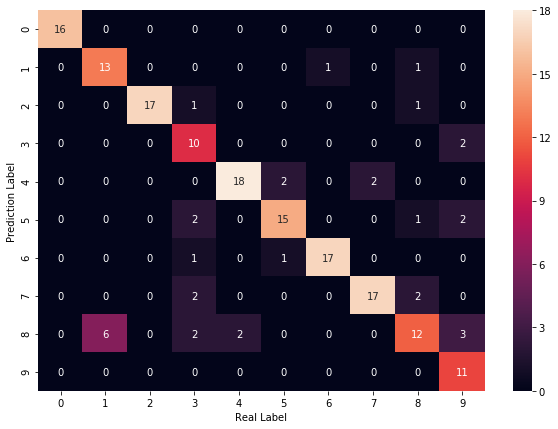

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:12 index:[5] real:5
#1 min_error:14 index:[2] real:2
#2 min_error:12 index:[1 8] real:8
#3 min_error:4 index:[0] real:0
#4 min_error:5 index:[1] real:1
#5 min_error:7 index:[7] real:7
#6 min_error:2 index:[6] real:6
#7 min_error:9 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:5 index:[1] real:1
#10 min_error:10 index:[7] real:7
#11 min_error:11 index:[8] real:4
#12 min_error:7 index:[6] real:6
#13 min_error:10 index:[3] real:3
#14 min_error:7 index:[1] real:1
#15 min_error:12 index:[3] real:3
#16 min_error:12 index:[8] real:9
#17 min_error:5 index:[1] real:1
#18 min_error:11 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:11 index:[8] real:8
#21 min_error:4 index:[4] real:4
#22 min_error:7 index:[3] real:3
#23 min_error:8 index:[1] real:1
#24 min_error:3 index:[4] real:4
#25 min_error:7 index:[0] real:0
#26 min_error:5 index:[5] real:5
#27 min_error:8 index:[3] real:3
#28 min_error:10 index:[1] real:6
#29 min_error:11 index:[3] real:9
#30 mi

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8948670377241806
Avg Base Learner:0.8347832062117775


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.13333333333333333
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.31666666666666665
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.45
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.4666666666666667
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5555555555555556
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.65
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.688888

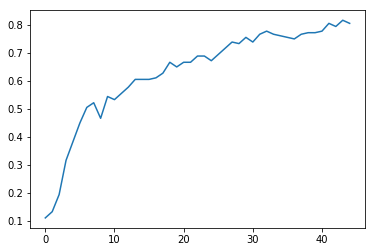

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [18]:
list_acc

[0.1111111111111111,
 0.13333333333333333,
 0.19444444444444445,
 0.31666666666666665,
 0.38333333333333336,
 0.45,
 0.5055555555555555,
 0.5222222222222223,
 0.4666666666666667,
 0.5444444444444444,
 0.5333333333333333,
 0.5555555555555556,
 0.5777777777777777,
 0.6055555555555555,
 0.6055555555555555,
 0.6055555555555555,
 0.6111111111111112,
 0.6277777777777778,
 0.6666666666666666,
 0.65,
 0.6666666666666666,
 0.6666666666666666,
 0.6888888888888889,
 0.6888888888888889,
 0.6722222222222223,
 0.6944444444444444,
 0.7166666666666667,
 0.7388888888888889,
 0.7333333333333333,
 0.7555555555555555,
 0.7388888888888889,
 0.7666666666666667,
 0.7777777777777778,
 0.7666666666666667,
 0.7611111111111111,
 0.7555555555555555,
 0.75,
 0.7666666666666667,
 0.7722222222222223,
 0.7722222222222223,
 0.7777777777777778,
 0.8055555555555556,
 0.7944444444444444,
 0.8166666666666667,
 0.8055555555555556]